<a href="https://colab.research.google.com/github/manishramamoorthy/DataScience-Projects/blob/main/Project_4_Mall_Customer_Segmentation_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Content of Mall Customer Segmentation K means Clustering :**

1) Importing Libraries          
2) Load a DataSet                            
3) Data Preprocessing            

    -> 1) Top Five Rows of DataSet     
    -> 2) Last Five Rows of DataSet    
    -> 3) Shape of DataSet      
    -> 4) Information of DataSet       
    -> 5) Data Types     
    -> 6) Checking Missing Values of DataSet     
    -> 7) Droping Duplicates Values     
    -> 9) Deleting Some Unwanted Features

4) Choosing Annual Income and Spending Scores Columns              
5) Feature Scaling                     
6) Finding Different Number of Cluster                    
7) Plotting Elbow Graph                  
8) Finding Number of Cluster in Using Elbow Graph                
9) Training K-Means Clustering Model                   
10) Plotting all Cluster and Centriod                       

**Summary of Mall Customer Segmentation K means Clustering :**           
Mall Customer Segmentation K means Clustering is a Unsupervised Learning. The Vision of Mall Customer Segmentation K means Clustering is To Find a How many Cluster Formed in a Dataset. 

# **1) Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# **2) Load a DataSet**

In [2]:
customer_data = pd.read_csv("/content/Mall_Customers.csv")

# **3) Data Preprocessing**

**1) Top Five Rows of DataSet**

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**2) Last Five Rows of DataSet**

In [4]:
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


**3) Shape of DataSet**

In [5]:
customer_data.shape
print("Number of Rows: ",customer_data.shape[0])
print("Number of Columns: ",customer_data.shape[1])

Number of Rows:  200
Number of Columns:  5


**4) Information of DataSet**

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**5) Data Types**

In [7]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**6) Checking Missing Values of DataSet**

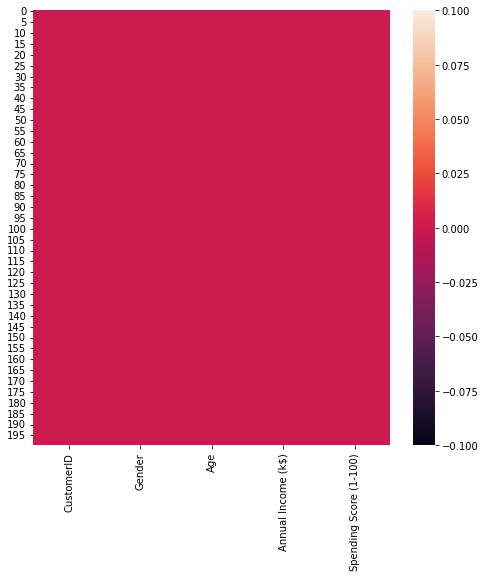

In [8]:
plt.figure(figsize = (8,8))
sns.heatmap(customer_data.isnull())

In [9]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**7) Droping Duplicates Values**

In [10]:
customer_data = customer_data.drop_duplicates()

**8) Droping Some Unwanted Features**

In [11]:
customer_data = customer_data.drop(["CustomerID","Gender","Age"],axis=1)

# **4) Choosing Annual Income and Spending Scores Columns**

In [12]:
X = customer_data[["Annual Income (k$)","Spending Score (1-100)"]].values

# **5) Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(customer_data)

# **6) Finding Different Number of Cluster**

WCSS -> Within Clusters Sum of Square

In [14]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,16):
  kmeans = KMeans(n_clusters=i, init="k-means++",random_state=7)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [15]:
print(wcss)

[269981.28, 183069.17582751298, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37271.88623658949, 30273.394312070042, 25050.832307547527, 21806.81299869546, 19634.554629349976, 17595.28888108518, 15810.343426539726, 14320.918182339483, 13176.672144763448, 11950.717801806035]


# **7) Plotting Elbow Graph**

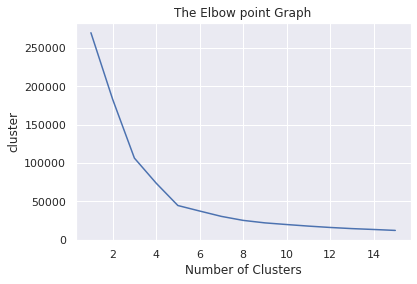

In [16]:
sns.set()
plt.plot(range(1,16),wcss)
plt.title("The Elbow point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("cluster")
plt.show()

# **8) Finding Number of Cluster in Using Elbow Graph**

Number of Cluster : 5      
5 Cluster : 0,1,2,3,4

# **9) Training K-Means Clustering Model**

In [17]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=7)
Y = kmeans.fit_predict(X)
print(Y)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 2 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 4 0 2 0 4 0 4 0 2 0 4 0 4 0 4 0 4 0 2 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


# **10) Plotting all Cluster and Centriod**

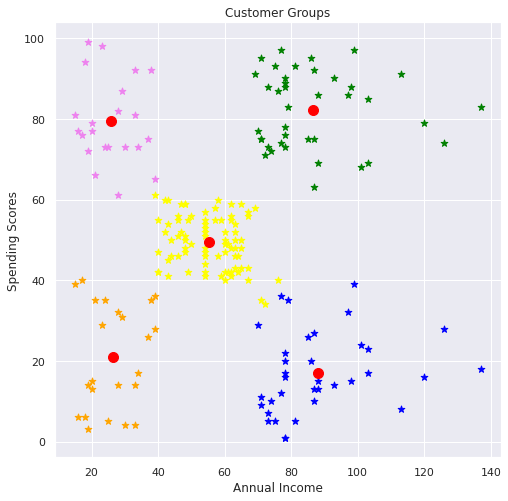

In [18]:
plt.figure(figsize=(8,8))

plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c="green",marker="*",label="Cluster 1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c="orange",marker="*",label="Cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c="yellow",marker="*",label="Cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c="violet",marker="*",label="Cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c="blue",marker="*",label="Cluster 5")

# Plotting the Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="red",label="centroids")

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Scores")
plt.show()